In [1]:
## ASSOCIATE D.A. CASE STUDY (DATACAMP)

In [2]:
# Set up the notebook

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


In [4]:
# Path on the file to read
claims_filepath = "C:/Users/User/Desktop/Data Analyst/Datacamp/Certificates/Career Track/Data Analyst Associate/claims.csv"

In [5]:
# Read the file into a variable claims
claims = pd.read_csv(claims_filepath)

In [6]:
## Examine the data

In [7]:
# Display the first 5 rows of the data
claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [8]:
# Display the last 5 rows of the data
claims.tail()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
93,0000000-00.2020.0.00.0023,208,"R$80,396.00",40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,"R$50,000.00",8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,"R$60,000.00",42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,"R$474,542.00",329473.49,NATAL,20,True,NaN
97,0000000-00.2020.0.00.0073,195,"R$40,000.00",15406.95,NATAL,1,False,NaN


In [9]:
## DATA VALIDATION

In [10]:
# Summary of the claims data to inspect
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [11]:
# Let's see if there are duplicates for 'Claim ID' column
claims['Claim ID'].value_counts()

0000000-00.2010.0.00.0094    1
0000000-00.2019.0.00.0056    1
0000000-00.2019.0.00.0038    1
0000000-00.2019.0.00.0033    1
0000000-00.2019.0.00.0091    1
                            ..
0000000-00.2017.0.00.0034    1
0000000-00.2017.0.00.0011    1
0000000-00.2017.0.00.0031    1
0000000-00.2017.0.00.0087    1
0000000-00.2020.0.00.0073    1
Name: Claim ID, Length: 98, dtype: int64

In [12]:
## The initial claim value in the currency of Brazil should be converted. Ex: “R$50,000.00” should be converted into 50000.
claims['Claim Amount'] = claims['Claim Amount'].str.replace('[R,$]', '', regex=True)

In [13]:
# Let's see the change
claims

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.00,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000.00,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000.00,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.00,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000.00,12610.50,FORTALEZA,1,False,meat
...,...,...,...,...,...,...,...,...
93,0000000-00.2020.0.00.0023,208,80396.00,40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,50000.00,8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,60000.00,42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,474542.00,329473.49,NATAL,20,True,NaN


In [14]:
# Let's see the shape of the df
print('Shape: ', claims.shape)

Shape:  (98, 8)


In [15]:
# Let's see which is the minimun time to close a claim
claims['Time to Close'].min()

-57

In [16]:
claims.iloc[[58]]

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
58,0000000-00.2019.0.00.0079,-57,3672.00,999.68,SAO LUIS,0,False,NaN


In [17]:
# Find the row index of the negative value
index= claims[claims['Time to Close'] < 0].index

In [18]:
# Drop this row from the df
claims.drop(index, inplace=True)

In [19]:
claims

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.00,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000.00,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000.00,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.00,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000.00,12610.50,FORTALEZA,1,False,meat
...,...,...,...,...,...,...,...,...
93,0000000-00.2020.0.00.0023,208,80396.00,40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,50000.00,8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,60000.00,42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,474542.00,329473.49,NATAL,20,True,NaN


In [20]:
# Let's inspect the 'Time to Close' column
claims['Time to Close'].value_counts()

120     3
2082    1
662     1
473     1
479     1
       ..
1177    1
1164    1
1169    1
1178    1
195     1
Name: Time to Close, Length: 95, dtype: int64

In [21]:
# Let's see again which is the minimum time 
claims['Time to Close'].min()

29

In [22]:
# Now, let's see which is the maximum time
claims['Time to Close'].max()

3591

In [23]:
# Convert the dtype from 'object' to 'float64'
claims['Claim Amount'] = claims['Claim Amount'].astype('float64')

In [24]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              97 non-null     object 
 1   Time to Close         97 non-null     int64  
 2   Claim Amount          97 non-null     float64
 3   Amount Paid           97 non-null     float64
 4   Location              97 non-null     object 
 5   Individuals on Claim  97 non-null     int64  
 6   Linked Cases          97 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 6.2+ KB


In [25]:
# Let's see the amount paid per claim
claims['Amount Paid'].value_counts()

34297.47     1
22701.02     1
11239.91     1
8205.71      1
52374.98     1
            ..
17349.58     1
164058.23    1
119084.55    1
28939.57     1
15406.95     1
Name: Amount Paid, Length: 97, dtype: int64

In [26]:
# Let's see how many claims are believed to be linked
claims['Linked Cases'].value_counts()

False    88
True      9
Name: Linked Cases, dtype: int64

In [27]:
# Let's see how many claims are filed by location
claims['Location'].value_counts()

SAO LUIS     29
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64

In [28]:
# Let's see how many claims are per the number of individuals
claims['Individuals on Claim'].value_counts()

1     28
2     16
3     11
4      9
0      6
6      5
7      4
8      4
10     2
17     2
5      2
30     1
18     1
41     1
15     1
33     1
9      1
32     1
20     1
Name: Individuals on Claim, dtype: int64

In [29]:
# Let's see how many NaN has the cause column
claims.loc[claims.Cause.isnull()]

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,NaN
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,NaN
5,0000000-00.2014.0.00.0077,578,150000.0,23214.56,FORTALEZA,6,False,NaN
7,0000000-00.2014.0.00.0043,2354,40870.0,24161.73,FORTALEZA,1,False,NaN
...,...,...,...,...,...,...,...,...
92,0000000-00.2020.0.00.0088,300,111970.0,43757.54,RECIFE,4,False,NaN
94,0000000-00.2020.0.00.0057,86,50000.0,8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,60000.0,42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,474542.0,329473.49,NATAL,20,True,NaN


In [30]:
# The causes of the food poisoning injuries are ‘vegetable’, ‘meat’, or ‘unknown’. Replace any empty rows with ‘unknown’.
claims = claims.fillna({'Cause':'unknown'})

In [31]:
# Let's also replace 'vegetables' by 'vegetable'.
claims['Cause'] = claims['Cause'].str.replace('vegetables','vegetable', regex=True)

In [32]:
# Display the final data
claims

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetable
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat
...,...,...,...,...,...,...,...,...
93,0000000-00.2020.0.00.0023,208,80396.0,40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,50000.0,8363.96,FORTALEZA,2,False,unknown
95,0000000-00.2020.0.00.0010,201,60000.0,42318.80,NATAL,2,False,unknown
96,0000000-00.2020.0.00.0059,200,474542.0,329473.49,NATAL,20,True,unknown


In [33]:
## Data Validation
 
# The original data is 98 rows and 8 columns. According to the data set description, the first thing I did was to remove the 
# currency symbol (R$) in the 'Claim Amount' column. Then, I replaced any empty rows with 'unknown' in the 'Cause' column. 
# Also, I converted the dtype 'object' to 'float64'. Even though it didn't say, I also replaced 'vegetables' to 'vegetable'
# to match the food poisoning injuries. There was also a negative value (-57) in the 'Time to Close' column which I removed 
# because the number of days shouldn't be negative which left 97 rows of data. Looking at the remaining columns:

# - There were 97 unique identifiers of the claim, as expected.
# - There were 95 unique values, the value 120 (days) was repeated two times.
# - Both, 'Claim Amount' and 'Amount Paid' had 97 non-null values.
# - There were 4 locations, as expected.
# - There were 97 individuals in total who filed a claim but, there were 6 claims where they had 0 individuals 
#   so this should be confirmed with the legal department providing the data to know what should be done.
# - There were 2 Linked Cases options - True/False, as expected.
# - There were 3 Cause options, as expected.

In [34]:
## DATA DISCOVERY AND VISUALIZATION

In [35]:
## Exploratory Analysis

Text(0, 0.5, 'Count')

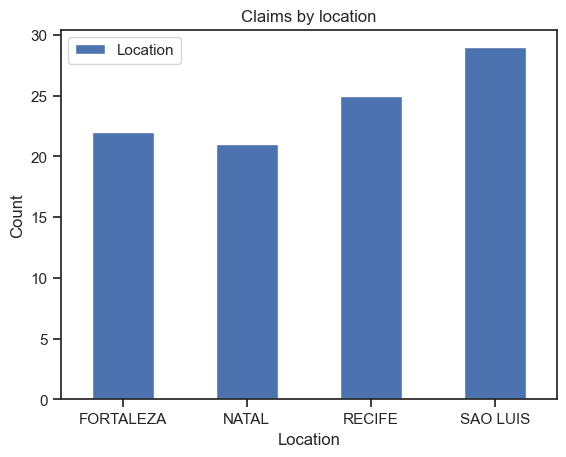

In [36]:
# QUESTION 1
# How does the number of claims differ across locations?

# let's cluster the location
sns.set_theme(style="ticks")
diamonds= sns.load_dataset("diamonds")

claims.groupby('Location')['Location'].count().plot(kind='bar',legend='Reverse', rot=360)
plt.title('Claims by location')
plt.ylabel('Count')

In [37]:
# This suggest SAO LUIS is the most common location where people file a claim, it has a total of 29 claims and RECIFE is not so
# far behind with 25 claims; FORTALEZA and NATAL are almost close with only one claim of difference, they have 22 and 21 claims
# respectively.

In [38]:
claims.groupby(['Location'])['Time to Close'].mean()

Location
FORTALEZA     775.500000
NATAL         581.142857
RECIFE        860.680000
SAO LUIS     1063.620690
Name: Time to Close, dtype: float64

Text(0.5, 12.44444444444443, 'Days')

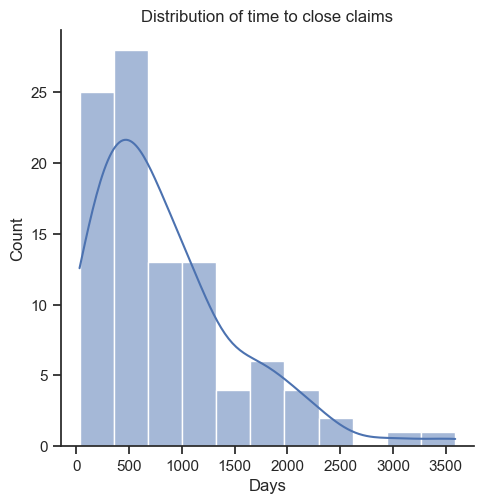

In [39]:
# QUESTION 2
# What is the distribution of time to close claims?

sns.set_theme(style="ticks")
diamonds= sns.load_dataset("diamonds")

sns.displot(claims, x='Time to Close', kde=True)
plt.title('Distribution of time to close claims')
plt.xlabel('Days')

In [40]:
# It looks like we have a right-skewed distribution which means most of the data falls to the right so you can see the legal 
# team delays between 500 and 1000 days per claim but there are also some claims who take 3000+ days to close which it's odd 
# because it means those claims took more than 8 years to close. 

In [41]:
# Finally, we want to see how the location impacts the average time to close a claim. In the graphic below you can see that 
# some outliers are dominating the data which are those data points that are located outside the whiskers of the box plot.
# For example, looking at SAO LUIS box plot, you can see the outlier is creating a potencial bias because the distribution 
# is shifted to the right so to make it easier to compare the rest of the data, we will remove those outliers. First, let's 
# see the range in number of days to close a claim per location. 

<AxesSubplot:title={'center':'Range in number of days to close a claim per location'}, xlabel='Location', ylabel='Time to Close'>

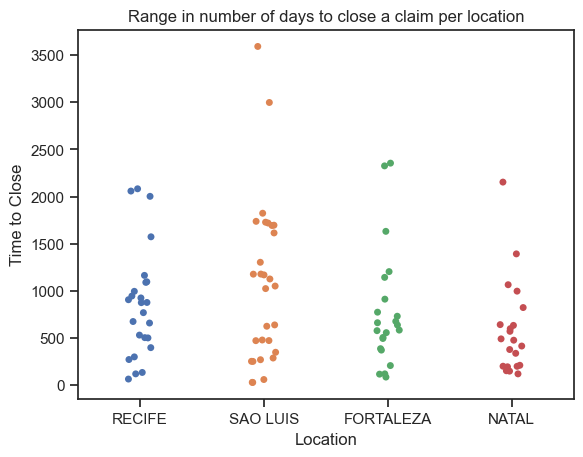

In [42]:
# QUESTION 3
# How does the average time to close claims differ by location?

# First, let's graph the variables
plt.title('Range in number of days to close a claim per location')
sns.stripplot(data=claims, x="Location", y="Time to Close") 

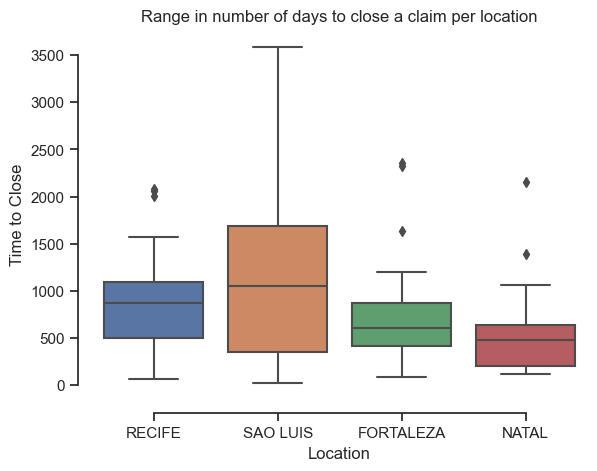

In [43]:
# Another way to see the graph
plt.title('Range in number of days to close a claim per location')
sns.boxplot(data=claims, x="Location", y="Time to Close")
sns.despine(offset=10, trim=True)

In [44]:
# We must remove the outliers for a better visualization

import numpy as np

# IQR
q1 = claims['Time to Close'].quantile(0.25)
q3 = claims['Time to Close'].quantile(0.75)
iqr = q3-q1

# Limit bounds
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('Old shape:', claims.shape)

Old shape: (97, 8)


In [45]:
# Above Upper bound
upper = claims['Time to Close'] >= upper_limit
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = claims['Time to Close'] <= lower_limit
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0     False
1      True
2      True
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Name: Time to Close, Length: 97, dtype: bool
(array([1, 2, 7], dtype=int64),)
Lower bound: 0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Name: Time to Close, Length: 97, dtype: bool
(array([], dtype=int64),)


In [46]:
# Let's see which rows are the outliers
claims.iloc[[1, 2, 7]]

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetable
7,0000000-00.2014.0.00.0043,2354,40870.0,24161.73,FORTALEZA,1,False,unknown


In [47]:
# Now, let's drop all of them
claims.drop([1, 2, 7], axis=0, inplace=True)

In [48]:
# Let's see the new data without outliers
claims

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,unknown
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat
5,0000000-00.2014.0.00.0077,578,150000.0,23214.56,FORTALEZA,6,False,unknown
6,0000000-00.2014.0.00.0076,378,50000.0,25281.18,NATAL,2,False,meat
...,...,...,...,...,...,...,...,...
93,0000000-00.2020.0.00.0023,208,80396.0,40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,50000.0,8363.96,FORTALEZA,2,False,unknown
95,0000000-00.2020.0.00.0010,201,60000.0,42318.80,NATAL,2,False,unknown
96,0000000-00.2020.0.00.0059,200,474542.0,329473.49,NATAL,20,True,unknown


In [49]:
print('New shape without outliers:', claims.shape)

New shape without outliers: (94, 8)


In [50]:
# After we remove the outlier you can see there are still some outliers but maybe those ones represent natural variations in 
# the population. Now, we can focus on the main range of data. Let's see the average time to close a claim (white dots) vs. 
# the location. If we just focus on the white dots between the box plots, NATAL had the lowest average time and SAO LUIS had 
# the highest. 

<AxesSubplot:title={'center':'Range in number of days to close a claim per location'}, xlabel='Location', ylabel='Time to Close'>

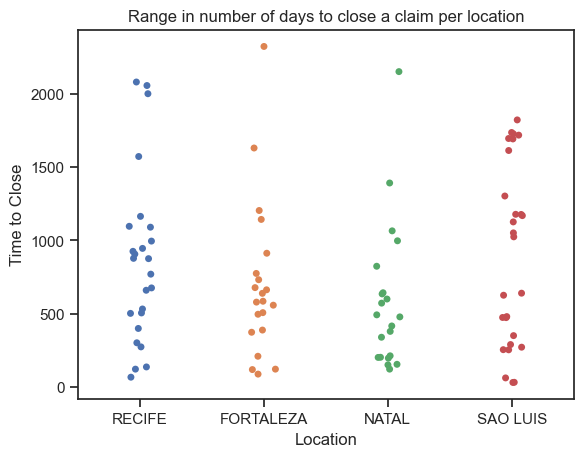

In [51]:
# Let's see the new graph without outliers
plt.title('Range in number of days to close a claim per location')
sns.stripplot(data=claims, x="Location", y="Time to Close") 

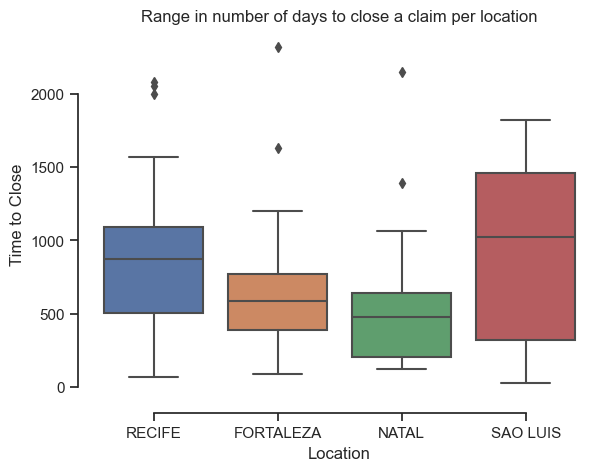

In [52]:
# Another way to see the new graph without outliers
plt.title('Range in number of days to close a claim per location')
sns.boxplot(data=claims, x="Location", y="Time to Close")
sns.despine(offset=10, trim=True)

In [53]:
# Let's just focus on the average time to close per location
claims.groupby(['Location'])['Time to Close'].mean()

Location
FORTALEZA    700.333333
NATAL        581.142857
RECIFE       860.680000
SAO LUIS     898.407407
Name: Time to Close, dtype: float64

Text(0.5, 1.0, 'Average time to close claims per location')

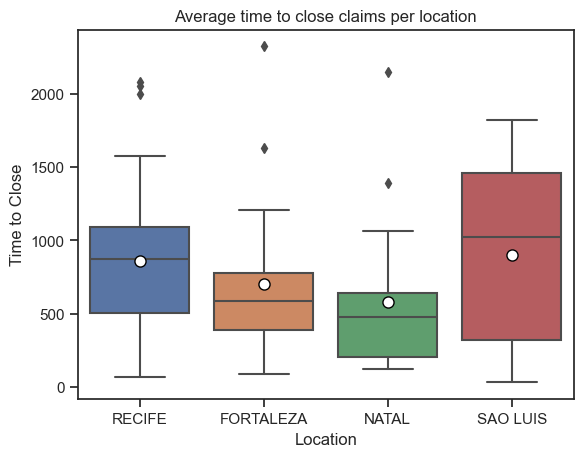

In [54]:
# Display a boxplot with the mean values
sns.boxplot(x='Location', y='Time to Close', data=claims, showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"8"})
plt.title('Average time to close claims per location')

In [55]:
# Now, for a better visualization you can see the time frame will vary from state to state; NATAL took 581 days on average to 
# close a claim. FORTALEZA was followed, with 700 days on average. RECIFE and SAO LUIS were close with 860 and 898 days on 
# average respectively.

Text(0, 0.5, 'Days')

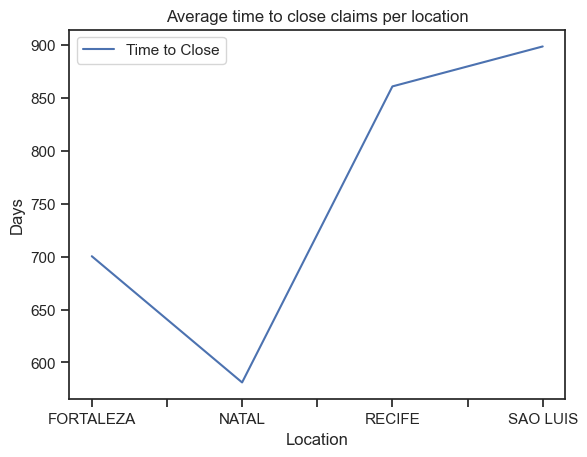

In [56]:
sns.set_theme(style="ticks")
diamonds= sns.load_dataset("diamonds")

claims.groupby(['Location'])['Time to Close'].mean().plot(kind='line',legend='Reverse', rot=360)
plt.title('Average time to close claims per location')
plt.ylabel('Days')

In [57]:
# Based on all of the above, we would recommend to the new head of the legal team to focus on those remaining outliers because
# those ones are causing a significant impact on the average time to close a claim but still further analysis should be done 
# to understand if there are other factors that are delaying the process across locations.